# License Status Prediction - Multiclass Classification
<hr style="border:1px solid gray"> </hr>

## Breakdown.

    1. Problem Description
    2. Data Exploration
    3. Feature Selection
    4. KNN Algorithm
    5. Naive Bias
    5. Logistic Regression
    6. Decisoin Tree
    



# 1.0. Overview
- The Classification algorithm is a type of supervised machine learning technique used to categorize a set of data into classes. For a given example of input data, a classification algorithm assigns the most probable class label. 

- An easy-to-understand example is classifying email as spam or non-spam. There are several use cases of classification in real-world scenarios. This project aims to give you the basic idea related to differentalgorithms used for classification.

## 1.1 Aim
- To predict license status for the given business.

## 1.2 Data Description
- The dataset used is a licensed dataset. It contains information about 86K different businesses
over various features. The target variable is the status of license which has five different classes.



---

# 2.0. Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
import category_encoders as ce
import seaborn as sns

## 2.1 Description of Libraries



- **Pandas**: is a powerful data manipulation and analysis library. It provides data structures like DataFrames to handle and analyze large datasets efficiently.

- **Numpy**: is a fundamental library for numerical computing in Python. It provides support for large, multi-dimensional arrays and matrices, as well as a wide range of mathematical functions.

- **Matplotlib**: is a plotting library that allows you to create a variety of static, animated, and interactive visualizations in Python.

- **os**: is a library that provides a way to interact with the operating system, including file and directory operations.

- **Category_encoders**: is a library that provides a range of encoding techniques for categorical data, including one-hot encoding, ordinal encoding, and target encoding.

---

# 3.0 Import the Data

In [3]:
# read the df
df = pd.read_csv("License_data.csv")

C:\Users\casie\AppData\Local\Temp\ipykernel_58452\1072171111.py:2: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("License_data.csv")


In [4]:
# print the shape of the dataframe
print(df.shape)

(85895, 32)


In [5]:
# show the top few rows
display(df.head().T)

,0,1,2,3,4
ID,35342-20020816,1358463-20051116,1980233-20090722,1476582-20040211,1141408-20080516
LICENSE ID,1256593,1639294,1980233,1476582,1896750
ACCOUNT NUMBER,32811,262311,345008,273121,213785
SITE NUMBER,1,29,1,1,1
LEGAL NAME,CARMEN CAHUE,"ISLA TROPICAL, INC.",DJS REMODELING,ALL-BRY CONSTRUCTION CO.,MCDONOUGH MECHANICAL SERVICE
DOING BUSINESS AS NAME,CLAUDIA'S BRIDAL SHOP,ISLA TROPICAL,"DJS REMODELING, INC.",ALL-BRY CONSTRUCTION CO.,MCDONOUGH MECHANICAL SERVICE
ADDRESS,2625 S CENTRAL PARK AVE 1,2825 W MONTROSE AVE,1605 CLAVEY RD 1,8 NORTH TRAIL,4081 JOSEPH DR
CITY,CHICAGO,CHICAGO,HIGHLAND,LEMONT,WAUKEGAN
STATE,IL,IL,IL,IL,IL
ZIP CODE,60623.0,60618,60035,60439,60087


- The lisence data is the tagget variable in this particular case.

In [6]:
# change the columns name
new_col_name = [col.replace(" ","_").lower() for col in df.columns]
df.columns = new_col_name


**List Comprehension**:

- The code uses list comprehension to create a new list of column names.

- col.replace(" ","_").lower() processes each column name (col) by replacing spaces with underscores and converting the name to lowercase.

**Assigning the New Column Names**:

- df.columns = new_col_name assigns the new list of column names to the DataFrame df.

## 3.1 Variable Description
- The target variable is lisense status in this particular case and depending on the data given, we would like to predict the status.

- Firstly we need to explore the data in order to undestand what we are dealing with

<b>Dependent Variable</b>   <br>
&nbsp;&nbsp;&nbsp;&nbsp;    1. AAI - License status is issued <br>
&nbsp;&nbsp;&nbsp;&nbsp;    2. AAC - License status is cancelled <br>
&nbsp;&nbsp;&nbsp;&nbsp;    3. REV - License status is revoked <br>
&nbsp;&nbsp;&nbsp;&nbsp;    4. REA - License status is revoked and appealed <br>
&nbsp;&nbsp;&nbsp;&nbsp;    5. INQ - License status is in enquiry <br>
    <br>
<b>Independent Variable</b> : <br>
&nbsp;&nbsp;&nbsp;&nbsp;    Timeline of the application status <br>
&nbsp;&nbsp;&nbsp;&nbsp;    Type of business <br>
&nbsp;&nbsp;&nbsp;&nbsp;    Location details of the business <br>
&nbsp;&nbsp;&nbsp;&nbsp;    Payment details <br>
_______________________________________________________________________________________________________________________________

# 4.0 Exploratory Data Analysis (EDA)
- In this particular area, we use visalization to understand the data we are working with.

In [7]:
df.columns


Index(['id', 'license_id', 'account_number', 'site_number', 'legal_name',
       'doing_business_as_name', 'address', 'city', 'state', 'zip_code',
       'ward', 'precinct', 'ward_precinct', 'police_district', 'license_code',
       'license_description', 'license_number', 'application_type',
       'application_created_date', 'application_requirements_complete',
       'payment_date', 'conditional_approval', 'license_term_start_date',
       'license_term_expiration_date', 'license_approved_for_issuance',
       'date_issued', 'license_status_change_date', 'ssa', 'latitude',
       'longitude', 'location', 'license_status'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85895 entries, 0 to 85894
Data columns (total 32 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   id                                 85895 non-null  object 
 1   license_id                         85895 non-null  int64  
 2   account_number                     85895 non-null  int64  
 3   site_number                        85895 non-null  int64  
 4   legal_name                         85895 non-null  object 
 5   doing_business_as_name             85894 non-null  object 
 6   address                            85895 non-null  object 
 7   city                               85895 non-null  object 
 8   state                              85895 non-null  object 
 9   zip_code                           85864 non-null  object 
 10  ward                               36194 non-null  float64
 11  precinct                           29194 non-null  flo

- There are two types of data chategories; Categorised data and Continuous data.

- Categorised data is data that has a limited number of possible values, such as gender (male, female) or product category (electronics, clothing).

- Continuous data, on the other hand, represents values that can take any value within a range, such as age, height, or temperature.

- In the above data, the columns like license and account number are considered as contimuous ahile the restlabeled object are categorised data.

- Another observation is the missing values in the data. in columns such as  ward, precinct and police_district, therefore some cleaning may be required


# Univariate Analysis

In [9]:
df["license_status"].value_counts()


license_status
AAI    55400
AAC    30200
REV      290
REA        3
INQ        2
Name: count, dtype: int64

- when focusing on the target variable, we can see that the data is imbalanced and slightly scewed.

- The next step is to begin with univariate analysis, whereby we analyse each variable before doing a bivariate analysis in order to compare how each variable is related to the target variable.



In [10]:
df["license_description"].value_counts()

license_description
Limited Business License                    50078
Home Repair                                 10633
Peddler, non-food                            2812
Home Occupation                              2809
Retail Food Establishment                    2321
                                            ...  
Caterer's Registration (Liquor)                 1
Indoor Special Event                            1
Airport Pushcart Liquor Midway - Class A        1
Not-For-Profit Club                             1
Motor Vehicle Services License                  1
Name: count, Length: 106, dtype: int64

- According to the data above, the majoriti of license applications are from Limited Business License, followed by home business licenses but the data is still difficult to compare so the next step is to normalize it for easier comparisons.

In [11]:
df["license_description"].value_counts(normalize=True)
# The data is now normalized and easier to compare.


license_description
Limited Business License                    0.583014
Home Repair                                 0.123791
Peddler, non-food                           0.032738
Home Occupation                             0.032703
Retail Food Establishment                   0.027021
                                              ...   
Caterer's Registration (Liquor)             0.000012
Indoor Special Event                        0.000012
Airport Pushcart Liquor Midway - Class A    0.000012
Not-For-Profit Club                         0.000012
Motor Vehicle Services License              0.000012
Name: proportion, Length: 106, dtype: float64

<Axes: ylabel='license_description'>

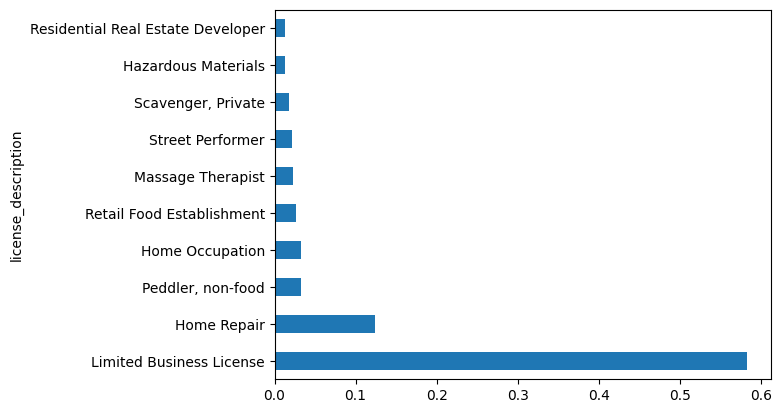

In [12]:
df["license_description"].value_counts(normalize=True)[:10].plot.barh()

- The bar chart clearly shows the top 10 most common license descriptions with Limited Business License being over ~55% of the processed licenses. Bar chart is a good way to visualize the data that is catergorical.

- As for the continuous data, we can use a histogram to visualize the data.


**Latitude Datapoints**

C:\Users\casie\AppData\Local\Temp\ipykernel_58452\1938700398.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['latitude'], color='g', bins=100, hist_kws={'alpha': 0.4})


<Axes: xlabel='latitude', ylabel='Density'>

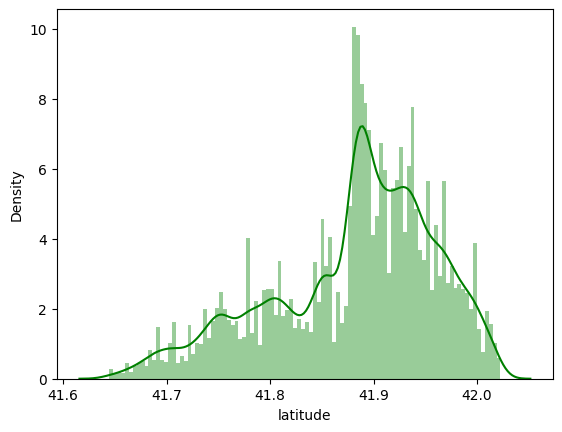

In [13]:
sns.distplot(df['latitude'], color='g', bins=100, hist_kws={'alpha': 0.4})

**Longitude Datapoints**

C:\Users\casie\AppData\Local\Temp\ipykernel_58452\1575428915.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['longitude'], color='g', bins=100, hist_kws={'alpha': 0.4})


<Axes: xlabel='longitude', ylabel='Density'>

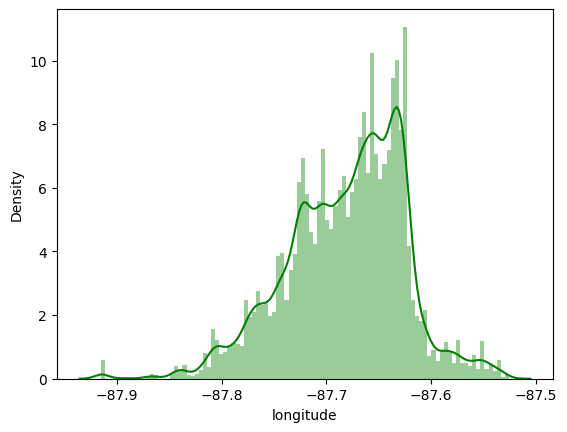

In [14]:
sns.distplot(df['longitude'], color='g', bins=100, hist_kws={'alpha': 0.4})

Latitude and longitude grephs can be visalised much better using a scatter plot.


# Bivariate Analysis


- This is when we plot the data in a way that shows the relationship between two variables.


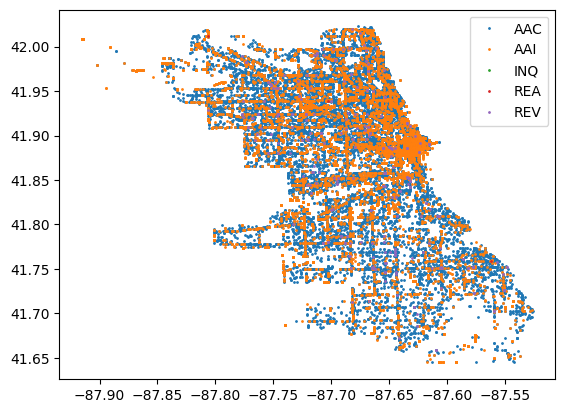

In [15]:
sdf = df[["longitude","latitude","license_status"]]
groups = sdf.groupby('license_status')

# Plot
fig, ax = plt.subplots()
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for name, group in groups:
    ax.plot(group.longitude, group.latitude, marker='o', linestyle='', ms=1, label=name)
ax.legend()

plt.show()

In [16]:
pd.crosstab(df["license_status"],df["application_type"]).reset_index()

application_type,license_status,C_CAPA,C_EXPA,C_LOC,ISSUE,RENEW
0,AAC,7,3,287,7916,21987
1,AAI,0,0,1112,15425,38863
2,INQ,0,0,0,2,0
3,REA,0,0,0,0,3
4,REV,0,2,1,55,232


In [17]:
pd.crosstab(df["license_status"],df["application_type"]).columns

Index(['C_CAPA', 'C_EXPA', 'C_LOC', 'ISSUE', 'RENEW'], dtype='object', name='application_type')

<Axes: title={'center': 'Application Type vs License Status'}, xlabel='license_status'>

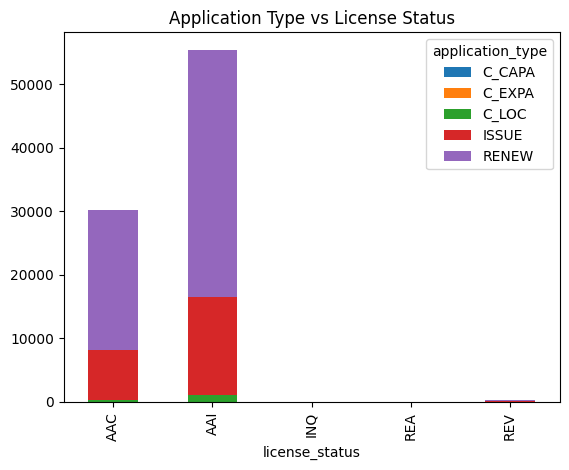

In [18]:
pd.crosstab(df["license_status"],df["application_type"]).reset_index().plot(x='license_status', kind='bar', stacked=True,
        title='Application Type vs License Status')

In [19]:
pd.crosstab(df["license_status"],df["conditional_approval"])

conditional_approval,N,Y
license_status,,
AAC,30182,18
AAI,55400,0
INQ,2,0
REA,3,0
REV,290,0


## Data Cleansing

1. **Missing Values** - lot of missing data for particular variables

2. **Unique Data** - id (no meaning)

3. **Data leakage** - The AAI alone doesn't have licesnse status change value (as the license are never revoked/cancelled) 


In [24]:
df.isnull().sum()

site_number                              0
legal_name                               0
doing_business_as_name                   1
city                                     0
state                                    0
zip_code                                31
ward                                 49701
precinct                             56701
ward_precinct                        49700
police_district                      54012
license_code                             0
license_description                      0
license_number                           1
application_type                         0
application_requirements_complete      214
payment_date                          1289
conditional_approval                     0
license_term_start_date                228
license_term_expiration_date            18
license_approved_for_issuance         6789
date_issued                              0
license_status_change_date           55400
latitude                             47246
longitude  

In [25]:
# Drop columns which are not relevent for the prediction / too many missing values
drop_col_list = ["id","license_id","ssa","location","application_created_date","account_number","address"]

df = df.drop(drop_col_list, axis=1)

KeyError: "['id', 'license_id', 'ssa', 'location', 'application_created_date', 'account_number', 'address'] not found in axis"

In [26]:
df

,site_number,legal_name,doing_business_as_name,city,state,zip_code,ward,precinct,ward_precinct,police_district,...,payment_date,conditional_approval,license_term_start_date,license_term_expiration_date,license_approved_for_issuance,date_issued,license_status_change_date,latitude,longitude,license_status
0,1,CARMEN CAHUE,CLAUDIA'S BRIDAL SHOP,CHICAGO,IL,60623.0,22.0,28.0,22-28,10.0,...,2002-08-21T00:00:00,N,2002-08-16T00:00:00,2003-08-15T00:00:00,2002-08-21T00:00:00,2006-04-11T00:00:00,NaN,41.843613,-87.714618,AAI
1,29,"ISLA TROPICAL, INC.",ISLA TROPICAL,CHICAGO,IL,60618,33.0,23.0,33-23,17.0,...,2005-11-03T00:00:00,N,2005-11-16T00:00:00,2006-11-15T00:00:00,2006-04-05T00:00:00,2006-06-12T00:00:00,2006-06-15T00:00:00,41.961132,-87.699626,AAC
2,1,DJS REMODELING,"DJS REMODELING, INC.",HIGHLAND,IL,60035,NaN,NaN,NaN,NaN,...,2009-07-22T00:00:00,N,2009-07-22T00:00:00,2011-07-15T00:00:00,2009-07-22T00:00:00,2009-07-22T00:00:00,NaN,NaN,NaN,AAI
3,1,ALL-BRY CONSTRUCTION CO.,ALL-BRY CONSTRUCTION CO.,LEMONT,IL,60439,NaN,NaN,NaN,NaN,...,2004-02-10T00:00:00,N,2004-02-11T00:00:00,2005-02-15T00:00:00,2004-02-10T00:00:00,2004-02-11T00:00:00,NaN,NaN,NaN,AAI
4,1,MCDONOUGH MECHANICAL SERVICE,MCDONOUGH MECHANICAL SERVICE,WAUKEGAN,IL,60087,NaN,NaN,NaN,NaN,...,2008-06-04T00:00:00,N,2008-05-16T00:00:00,2010-05-15T00:00:00,2008-06-04T00:00:00,2008-06-05T00:00:00,NaN,NaN,NaN,AAI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85890,1,UNITED PARCEL SERVICE,UNITED PARCEL SERVICE,CHICAGO,IL,60607.0,11.0,28.0,11-28,1.0,...,2012-05-07T00:00:00,N,2012-05-16T00:00:00,2014-05-15T00:00:00,2012-05-07T00:00:00,2012-05-08T00:00:00,2012-12-29T00:00:00,41.863501,-87.642210,AAC
85891,1,"EXPRESS BOARD UP SERVICE, INC.","EXPRESS BOARD UP SERVICE, INC.",MACHESNEY PARK,IL,61115.0,NaN,NaN,NaN,NaN,...,2007-05-22T00:00:00,N,2007-05-22T00:00:00,2009-06-15T00:00:00,2007-05-22T00:00:00,2007-05-22T00:00:00,NaN,NaN,NaN,AAI
85892,2,ARAMARK SMMS LLC,ARAMARK FACILITY SERVICES,DOWNERS GROVE,IL,60515.0,NaN,NaN,NaN,NaN,...,2009-01-09T00:00:00,N,2009-01-16T00:00:00,2011-01-15T00:00:00,2009-01-09T00:00:00,2009-12-08T00:00:00,NaN,NaN,NaN,AAI
85893,43,GENERAL NUTRITION CORPORATION,GENERAL NUTRITION CENTER # 61,CHICAGO,IL,60632.0,23.0,NaN,23-,NaN,...,2011-10-03T00:00:00,N,2011-10-16T00:00:00,2013-10-15T00:00:00,2011-10-03T00:00:00,2011-10-11T00:00:00,2012-05-08T00:00:00,41.799012,-87.723181,AAC
